<>:26: SyntaxWarning: invalid escape sequence '\h'
<>:26: SyntaxWarning: invalid escape sequence '\h'
/var/folders/2s/299fsjvd5w13x4x_w7x554fh0000gn/T/ipykernel_24914/3947225309.py:26: SyntaxWarning: invalid escape sequence '\h'
  """


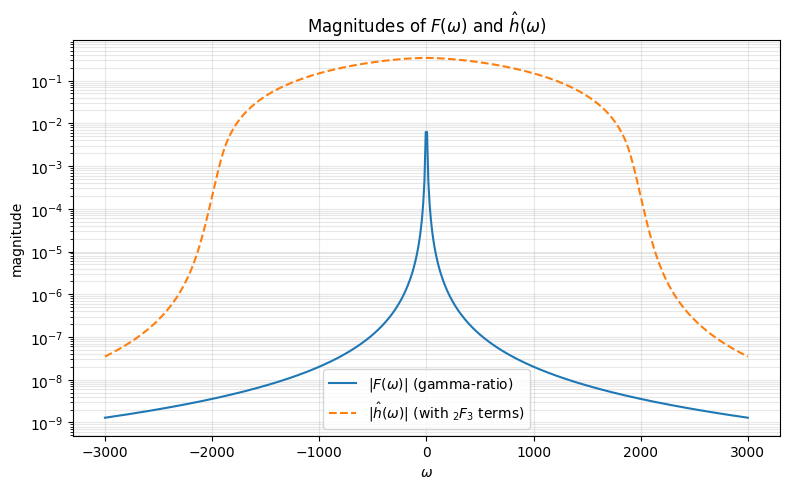

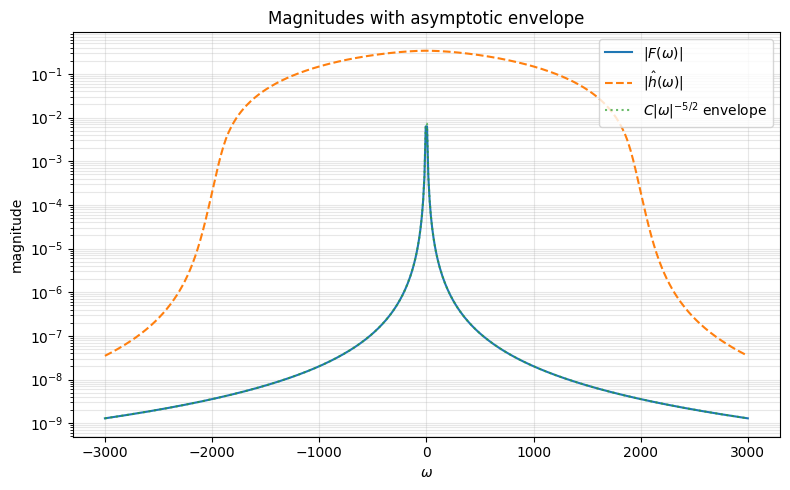

In [ ]:
import numpy as np
import mpmath as mp
import matplotlib.pyplot as plt

# --- precision -------------------------------------------------------------
mp.mp.dps = 50  # increase if you push to very large |omega|

# --- parameters ------------------------------------------------------------
D = 1.0         # diameter-like scale (set to your value)
a = 1000         # defocus / aperture param in your _2F3 terms (set to your value)
W = 3000.0       # plot up to |omega| <= W
N = 500         # number of samples

# --- definitions -----------------------------------------------------------
def F_simple(omega, D=D):
    """F(ω) = (π^{-iω} D^{1-iω}) / (2√(2π)) * Γ(1 - iω/2)Γ(1/2 + iω/2) / [Γ(1/2)Γ(3/2 - iω/2)Γ(5/2 - iω/2)]"""
    w = mp.mpf(omega)
    iy2 = mp.mpc(0, w/2)
    pref = mp.power(mp.pi, -1j*w) * mp.power(D, 1 - 1j*w) / (2*mp.sqrt(2*mp.pi))
    num = mp.gamma(1 - iy2) * mp.gamma(mp.mpf('0.5') + iy2)
    den = mp.gamma(mp.mpf('0.5')) * mp.gamma(mp.mpf('1.5') - iy2) * mp.gamma(mp.mpf('2.5') - iy2)
    return pref * (num/den)

def h_hat(omega, D=D, a=a):
    """
    \hat{h}(ω) with the two {}_2F_3 terms as provided.
    """
    w = mp.mpf(omega)
    iy2 = mp.mpc(0, w/2)
    pref = mp.power(mp.pi, -1j*w) * mp.power(D, 1 - 1j*w) / (2*mp.sqrt(2*mp.pi))

    # --- Term 1 ---
    num1 = mp.gamma(mp.mpf('1.5') - iy2) * mp.gamma(1 + iy2)
    den1 = mp.gamma(mp.mpf('1.5')) * mp.gamma(2 - iy2) * mp.gamma(3 - iy2)
    hyp1 = mp.hyper([mp.mpf('0.5') - iy2, mp.mpf('1.5') - iy2],
                    [mp.mpf('1.5'), 2 - iy2, 3 - iy2],
                    -a*a)
    term1 = a * (num1/den1) * hyp1

    # --- Term 2 ---
    num2 = mp.gamma(1 - iy2) * mp.gamma(mp.mpf('0.5') + iy2)
    den2 = mp.gamma(mp.mpf('0.5')) * mp.gamma(mp.mpf('1.5') - iy2) * mp.gamma(mp.mpf('2.5') - iy2)
    hyp2 = mp.hyper([1 - iy2, -iy2],
                    [mp.mpf('0.5'), mp.mpf('1.5') - iy2, mp.mpf('2.5') - iy2],
                    -a*a)
    term2 = (num2/den2) * hyp2

    return pref * (term1 + term2)

# --- sample grid -----------------------------------------------------------
omegas = np.linspace(-W, W, N)

# --- evaluate magnitudes ---------------------------------------------------
mag_simple = np.array([abs(complex(F_simple(float(w)))) for w in omegas])
mag_hhat   = np.array([abs(complex(h_hat(float(w))))    for w in omegas])

# --- plot (both on one figure) --------------------------------------------
plt.figure(figsize=(8,5))
plt.plot(omegas, mag_simple, label=r'$|F(\omega)|$ (gamma-ratio)')
plt.plot(omegas, mag_hhat,   label=r'$|\hat h(\omega)|$ (with ${}_2F_3$ terms)', linestyle='--')
plt.yscale('log')
plt.xlabel(r'$\omega$')
plt.ylabel('magnitude')
plt.title('Magnitudes of $F(\\omega)$ and $\\hat h(\\omega)$')
plt.legend()
plt.grid(True, which='both', alpha=0.3)
plt.tight_layout()
plt.show()

# --- OPTIONAL: overlay asymptotic envelope (uncomment to see) -------------
C = 2*D/np.pi
asym_envelope = C * np.power(np.maximum(1e-12, np.abs(omegas)), -2.5)
plt.figure(figsize=(8,5))
plt.plot(omegas, mag_simple, label=r'$|F(\omega)|$')
plt.plot(omegas, mag_hhat,   label=r'$|\hat h(\omega)|$', linestyle='--')
plt.plot(omegas, asym_envelope, label=r'$C|\omega|^{-5/2}$ envelope', alpha=0.7, linestyle=':')
plt.yscale('log')
plt.xlabel(r'$\omega$')
plt.ylabel('magnitude')
plt.title('Magnitudes with asymptotic envelope')
plt.legend()
plt.grid(True, which='both', alpha=0.3)
plt.tight_layout()
plt.show()


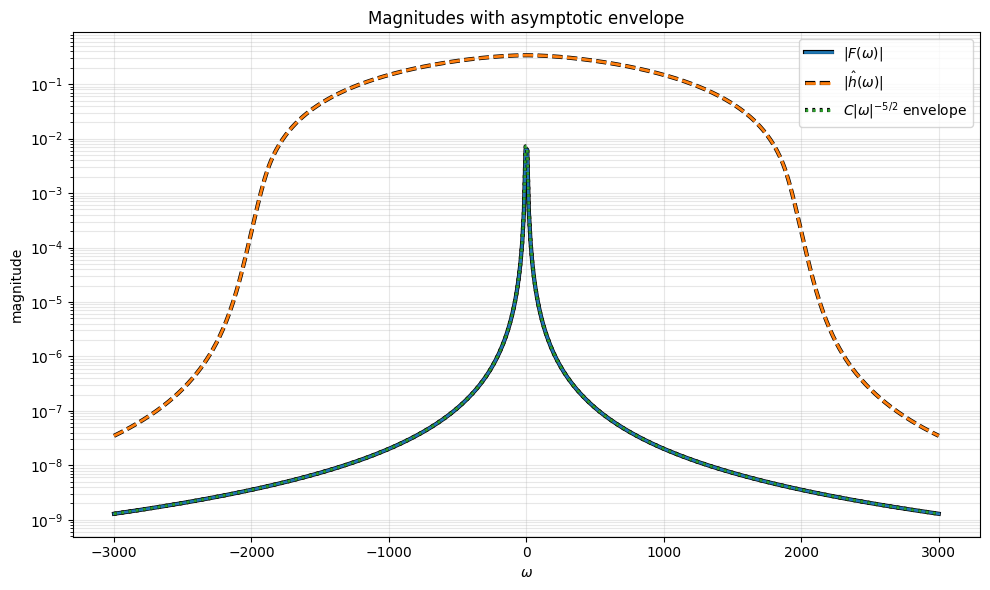

In [ ]:
import matplotlib.patheffects as pe
text_path_effects=[pe.Stroke(linewidth=4.5, foreground='k'), pe.Normal()]
path_effects = [pe.Stroke(linewidth=3, foreground='k'), pe.Normal()]
C = 2*D/np.pi
asym_envelope = C * np.power(np.maximum(1e-12, np.abs(omegas)), -2.5)
plt.figure(figsize=(10,6))
plt.plot(omegas, mag_simple, label=r'$|F(\omega)|$', linewidth=2,path_effects=path_effects)
plt.plot(omegas, mag_hhat,   label=r'$|\hat h(\omega)|$', linestyle='--',linewidth=2,path_effects=path_effects)
plt.plot(omegas, asym_envelope, label=r'$C|\omega|^{-5/2}$ envelope', alpha=1, linestyle=':',linewidth=2,path_effects=path_effects)
plt.yscale('log')
plt.xlabel(r'$\omega$')
plt.ylabel('magnitude')
plt.title('Magnitudes with asymptotic envelope')
plt.legend()
plt.grid(True, which='both', alpha=0.3)
plt.tight_layout()
#plt.savefig('mags.png',dpi=300,bbox_inches='tight')
plt.show()